<a href="https://colab.research.google.com/github/RAnalyst1111/Analisis-de-datos-Casas/blob/main/An%C3%A1lisis_de_datos_Casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_original=pd.read_csv('/content/casas.csv')

### **Comienzo del análisis exploratorio en los datos**

In [ ]:
type(df_original)

pandas.core.frame.DataFrame

In [ ]:
df_original.head()

,m2,Ano_construccion,n_habitaciones,n_ventanas,n_banos,Precio
0,87.912100,1947,3,6,2,299538.5044
1,85.315972,2022,3,6,1,301890.5662
2,78.376723,1961,2,6,1,268969.3187
3,112.140336,2011,4,16,1,394649.8780
4,107.020064,1968,3,3,1,368577.0992


In [ ]:
df_original.describe()

,m2,Ano_construccion,n_habitaciones,n_ventanas,n_banos,Precio
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,96.952059,1992.651007,3.174497,9.248322,1.697987,339349.852152
std,21.221602,86.165768,0.723463,13.114313,0.859798,71441.876826
min,-22.301393,1887.000000,1.000000,2.000000,1.000000,100901.666500
25%,84.709784,1966.000000,3.000000,4.000000,1.000000,292308.157700
50%,95.919298,1987.000000,3.000000,8.000000,1.000000,334774.486700
75%,111.415418,2010.000000,4.000000,12.000000,2.000000,388340.087400
max,144.855824,2987.000000,5.000000,160.000000,4.000000,605233.582600


### **Cosas que notamos en describe y necesitan ser analizadas con mayor profundidad**

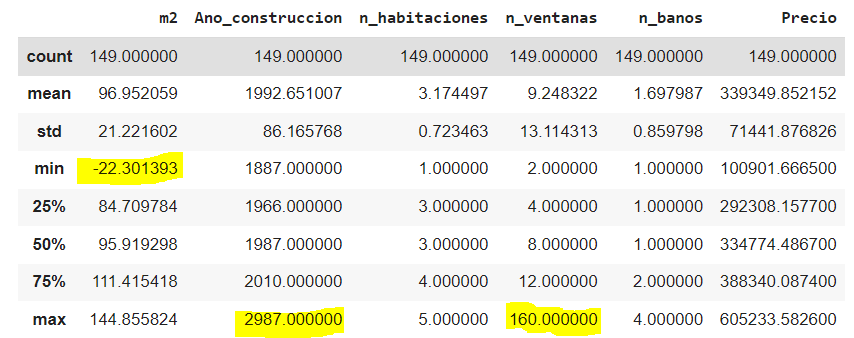

Metros cuadrados negativos => Una casa no puede tener un valor negativo de metros cuadrados.

Año de construcción => 
  Valor máximo, se le asignó a uno o más campos, un año que aún no ha llegado. Podría ser que el año "2987" sea una mera etiqueta interna para identificar ciertas propiedades?. Al ser un número, afecta los cálculos que se apliquen sobre el conjunto de datos y causa distorsiones en la interpretación de resultados.

N_Ventanas => Nos resulta raro creer que, una o más propiedades cuenten con 160 ventanas. Salvo de que, se tratase de un tipo muy particular de arquitectura. A los fines prácticos de este ejercicio, identificaremos y reemplazaremos este valor con el promedio pero coincidimos que, en un ámbito laboral real, solicitaríamos mayor contexto sobre el conjunto de datos. Por ejemplo: Este conjunto de datos, se trata de todas las obras realizadas por un arquitecto en su vida?, es un conjunto de datos de un censo?.

Precio => Vemos que el valor para una o más propiedades gira en torno a los 600.000. Es un valor superior en 50% del 75% de las propiedades. Sentimos curiosidad por conocer características adicionales que hagan al valor de la propiedad para poder determinar si se trata o no de un dato erróneo (Algunos ejemplos de características: Ubicación, antiguos propietarios, arquitecto que lo construyó)




#### Gráficos de las columnas de df_original

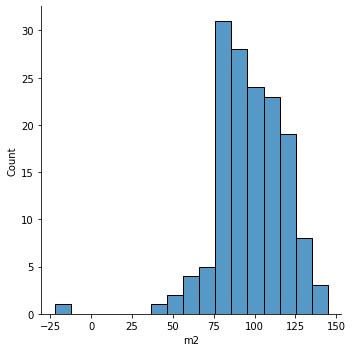

In [ ]:
sns.displot(df_original["m2"])
plt.show()

Como hemos identificado anteriormente, existe al menos 1 propiedad con metros cuadrados negativos; y

Existe una concentración de propiedades con valores que oscilan entre los 75 m2 y 125 m2

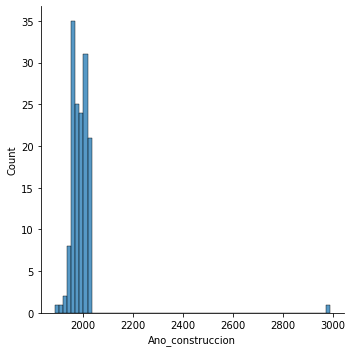

In [ ]:
sns.displot(df_original["Ano_construccion"])
plt.show()

Al existir una brecha tan extensa entre 2 años de construcción, ocasiona que visualmente no se pueda analizar o interpretar de forma sencilla y simple un conjunto de datos. Por ello, la necesidad de:

- En caso de tratar con datos erróneos: tratar el dato
- En caso de que los datos sean correctos: agrupar los datos y realizar análisis en función a agrupaciones o excluir los valores que se encuentren más alejados del grupo (por no tener un incidencia significante sobre el % total)

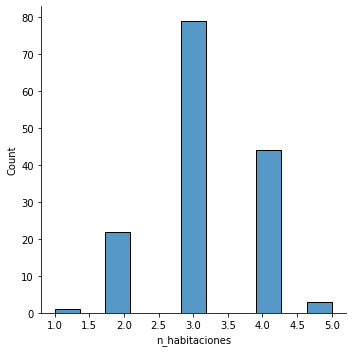

In [ ]:
sns.displot(df_original["n_habitaciones"])
plt.show()

Podemos observar que, la mayoría de propiedades (de este conjunto de datos) cuentan con 3 o 4 habitaciones (>=80%)

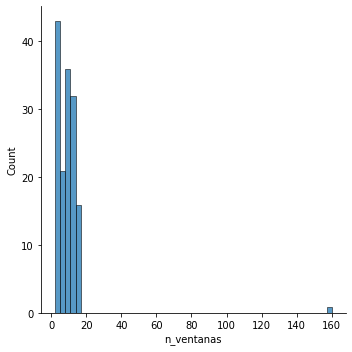

In [ ]:
sns.displot(df_original["n_ventanas"])
plt.show()

Fácilmente, se puede evidenciar la propiedad con 160 ventanas.

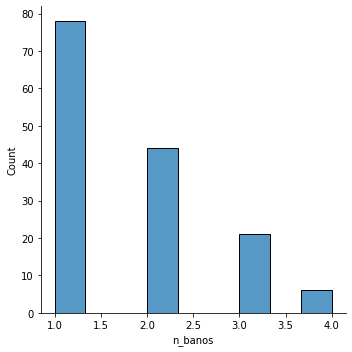

In [ ]:
sns.displot(df_original["n_banos"])
plt.show()

Es frecuente encontrarse con una propiedad de 2 baños pero es aún más frecuente encontrarse una propiedad con 1 baño

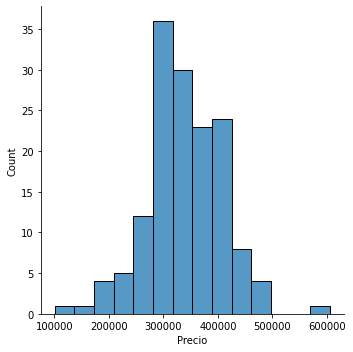

In [ ]:
sns.displot(df_original["Precio"])
plt.show()

Lo normal es encontrarse con propiedades que tengan un precio entre los 300.000 y 400.000

### **Inicio del tratamiento del dato**

Creación de un dataframe intermedio en el cual trabajar y poder luego comparar resultados entre 'original' y 'resultado'

In [ ]:
df_resultado=pd.read_csv('/content/casas.csv')

Verificamos si hay campos NaN

In [ ]:
print(df_resultado.isna().sum(axis=0))

m2                  0
Ano_construccion    0
n_habitaciones      0
n_ventanas          0
n_banos             0
Precio              0
dtype: int64


No se han encontrado datos del tipo NaN

#### Sección: columna M2

Identificamos esos campos donde los m2 son menores o iguales a 0

In [ ]:
df_resultado[df_resultado["m2"]<=0]

,m2,Ano_construccion,n_habitaciones,n_ventanas,n_banos,Precio
78,-22.301393,2008,3,6,3,335869.0143


El indice 78 cuenta con metros cuadrados negativos (lo cual es imposible físicamanete que esto suceda). Se decide identificar otras propiedades con características similares para intentar predecir los m2 que debería tener y, así, reemplazarlo por este nuevo valor

In [ ]:
#Identificamos la existencia de otras propiedades con características similares para intentar predecir sus m2
df_resultado[
            df_resultado.n_habitaciones.isin([3]) &
            ~df_resultado.Ano_construccion.isin([2008]) &
            df_resultado.n_ventanas.isin([6]) &
            df_resultado.n_banos.isin([3])
]

,m2,Ano_construccion,n_habitaciones,n_ventanas,n_banos,Precio
12,86.883516,1989,3,6,3,302419.8001


No existen propiedades similares en el año 2008 por eso se buscan propiedades en años distintos.

Podría ser que desde el año 1989 al año 2008, el concepto de arquitectura para este tipo de propiedades se haya visto alterado y, como consecuencia, los metros cuadrados totales resultantes para la misma construcción en distintos años se haya visto disminuido en una leve cuantía. Aún así, los metros cuadrados de esta propiedad en el año 1989 es menor a la media del conjunto de datos. Por esto, optamos por el menor valor entre ambos (m2 de 1989).

In [ ]:
#Testing de extracción del value con múltiples condiciones
cond= df_resultado[
            df_resultado.n_habitaciones.isin([3]) &
            ~df_resultado.Ano_construccion.isin([2008]) &
            df_resultado.n_ventanas.isin([6]) &
            df_resultado.n_banos.isin([3])]
cond.at[12,"m2"]

86.8835165

In [ ]:
#Reemplazo del valor en la fila 78
cond= df_resultado[
            df_resultado.n_habitaciones.isin([3]) &
            ~df_resultado.Ano_construccion.isin([2008]) &
            df_resultado.n_ventanas.isin([6]) &
            df_resultado.n_banos.isin([3])]

indice= df_resultado[df_resultado["m2"]<=0].index

df_resultado.at[indice, "m2"] = cond.at[12,"m2"]
df_resultado[78:79]

,m2,Ano_construccion,n_habitaciones,n_ventanas,n_banos,Precio
78,86.883516,2008,3,6,3,335869.0143


Reemplazo de valor en la fila 78, realizado con éxito

#### Sección: columna Ano_construccion

##### Detección de Ano_construccion superior al año actual

In [ ]:
df_resultado[df_resultado["Ano_construccion"]>2022]

,m2,Ano_construccion,n_habitaciones,n_ventanas,n_banos,Precio
144,81.043402,2987,3,3,1,286772.0776


##### Identificación por programación todos los índices de filas que cumplan la condición

In [ ]:
ano_mayor_actual= df_resultado[df_resultado["Ano_construccion"]>2022].index
ano_mayor_actual

Int64Index([144], dtype='int64')

##### Captura del promedio de todas las propiedades

In [ ]:
df_resultado["Ano_construccion"].mean()

1992.6510067114093

Para que tenga el menor impacto posible en análisis estadísticos, se reemplazará el año de la celda por el promedio de los año. 

Hemos descartado la opción de eliminar la fila completa, ya que, los demás datos podrían ser utilizados para realizar otros tipos de análisis.

Por ejemplo: Análisis de relación entre precio por m2 o planteo de hipótesis en función al n_habitaciones/n_ventanas/n_banos.

In [ ]:
df_resultado.at[ano_mayor_actual, "Ano_construccion"] = df_resultado["Ano_construccion"].mean()
df_resultado[144:145]

,m2,Ano_construccion,n_habitaciones,n_ventanas,n_banos,Precio
144,81.043402,1992.651007,3,3,1,286772.0776


La media ingresada en Ano_construccion es menor a la media de todo el conjunto de datos debido a que, se excluye la fila 144

#### Sección: columna n_ventanas

Identificación de las propiedades con más de 12 ventanas.

In [ ]:
df_resultado[df_resultado["n_ventanas"]>12]

,m2,Ano_construccion,n_habitaciones,n_ventanas,n_banos,Precio
3,112.140336,2011.0,4,16,1,394649.8780
8,119.917599,2022.0,4,16,3,424328.4246
19,119.814836,1992.0,4,16,3,417674.5190
25,118.050989,1955.0,4,16,4,403881.9462
29,138.295232,1958.0,5,15,3,473868.6137
30,123.297279,1977.0,4,16,2,426577.7624
42,118.730747,1987.0,4,16,1,412856.4888
57,108.655948,1960.0,4,16,4,372689.9017
64,114.521289,2022.0,4,16,1,605233.5826
80,110.915775,1993.0,4,16,3,386846.4938


La fila con índice 123 es la única fila que cuenta con 160 ventanas en su propiedad.

Visualizando las demás propiedades de 16 ventanas, podemos interpretar que: existe una alta probabilidad de que el valor que se haya querido ingresar realmente era de 16 ventanas (no de 160 ventanas). En un contexto laboral real,y si existiese la posibilidad, reportaríamos esta detección para confirmar de que se tratase de una propiedad de 16 ventanas. Caso contrario y en caso de tratarse de una extensa base de datos, excluiríamos el registro en este análisis.

En esta actividad, reemplazaremos el valor de 160 por 16.

Captura del índice de la propiedad con 160 ventanas:

In [ ]:
indice_160_ventanas= df_resultado[df_resultado["n_ventanas"]==160].index
indice_160_ventanas

Int64Index([123], dtype='int64')

Reemplazo de valor 160 por 16 para la propiedad capturada

In [ ]:
df_resultado.at[indice_160_ventanas, "n_ventanas"] = 16
df_resultado[123:124]

,m2,Ano_construccion,n_habitaciones,n_ventanas,n_banos,Precio
123,118.841535,2008.0,4,16,2,417609.1528


### **Comparativa entre df_original y df_resultado**

In [ ]:
df_original.describe()

,m2,Ano_construccion,n_habitaciones,n_ventanas,n_banos,Precio
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,96.952059,1992.651007,3.174497,9.248322,1.697987,339349.852152
std,21.221602,86.165768,0.723463,13.114313,0.859798,71441.876826
min,-22.301393,1887.000000,1.000000,2.000000,1.000000,100901.666500
25%,84.709784,1966.000000,3.000000,4.000000,1.000000,292308.157700
50%,95.919298,1987.000000,3.000000,8.000000,1.000000,334774.486700
75%,111.415418,2010.000000,4.000000,12.000000,2.000000,388340.087400
max,144.855824,2987.000000,5.000000,160.000000,4.000000,605233.582600


In [ ]:
df_resultado.describe()

,m2,Ano_construccion,n_habitaciones,n_ventanas,n_banos,Precio
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,97.684844,1985.977524,3.174497,8.281879,1.697987,339349.852152
std,18.825789,26.440418,0.723463,4.218813,0.859798,71441.876826
min,41.650186,1887.000000,1.000000,2.000000,1.000000,100901.666500
25%,84.831505,1966.000000,3.000000,4.000000,1.000000,292308.157700
50%,95.919298,1987.000000,3.000000,8.000000,1.000000,334774.486700
75%,111.415418,2009.000000,4.000000,12.000000,2.000000,388340.087400
max,144.855824,2022.000000,5.000000,16.000000,4.000000,605233.582600


#### Distribución antes de los cambios realizados

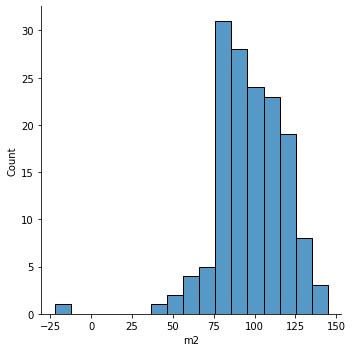

In [ ]:
#Distribución pre-cambios
sns.displot(df_original["m2"])
plt.show()

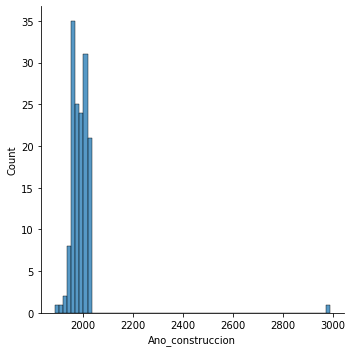

In [ ]:
#Distribución pre-cambios
sns.displot(df_original["Ano_construccion"])
plt.show()

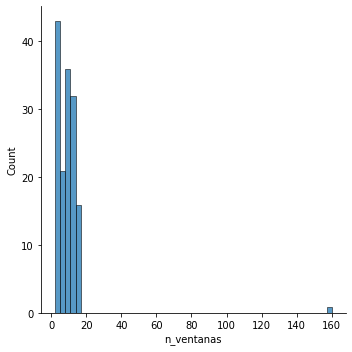

In [ ]:
sns.displot(df_original["n_ventanas"])
plt.show()

#### Distribución luego de los cambios realizados

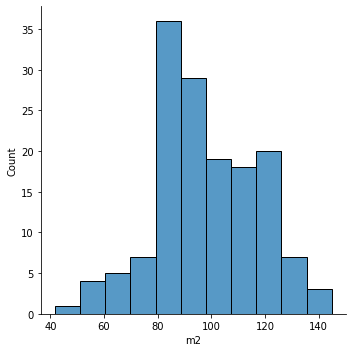

In [ ]:
sns.displot(df_resultado["m2"])
plt.show()

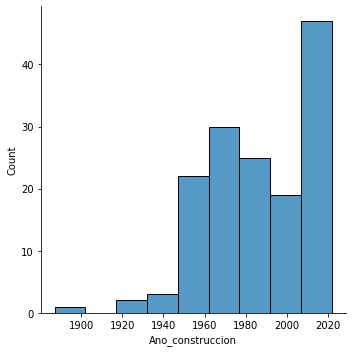

In [ ]:
sns.displot(df_resultado["Ano_construccion"])
plt.show()

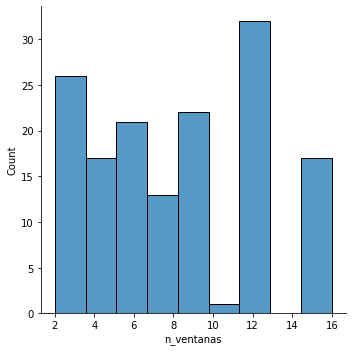

In [ ]:
sns.displot(df_resultado["n_ventanas"])
plt.show()

In [ ]:
df_resultado

,m2,Ano_construccion,n_habitaciones,n_ventanas,n_banos,Precio
0,87.912100,1947.000000,3,6,2,299538.5044
1,85.315972,2022.000000,3,6,1,301890.5662
2,78.376723,1961.000000,2,6,1,268969.3187
3,112.140336,2011.000000,4,16,1,394649.8780
4,107.020064,1968.000000,3,3,1,368577.0992
...,...,...,...,...,...,...
144,81.043402,1992.651007,3,3,1,286772.0776
145,112.618247,1977.000000,4,4,3,389630.9806
146,83.472145,1967.000000,3,3,1,287331.9925
147,119.494330,1964.000000,4,12,2,410702.0110
